# Mini Project 2

Submitted By: Francesca Felizardo  
IOD Cohort Feb 2025  
June 30, 2025  

Instructions:

The purpose of this Mini Project is to reinforce skills covered in recent modules, with a focus on classification and model evaluation.
Find a dataset suitable for a classification algorithm, ideally one that is "dirty" (i.e., requires cleaning and preprocessing).
Choose a business problem and translate it into a data science problem. Select a dataset and analyse it using techniques learned in recent modules. These techniques include (but are not limited to) the following: Data Wrangling, EDA, Feature Importance and Feature Selection.


Use at least three classification algorithms covered in class to build predictive models. 

Evaluate model performance using appropriate metrics such as Accuracy, Precision, Recall, F1 Score, and Confusion Matrix. Additionally, include to show the relationship between key features and predicted outcomes, and provide an (e.g., predicted vs. true labels) to help visualise model performance. Compare the performance of the models and provide insights on which one is most suitable for the business problem.  

Presentation Date: Monday, June 30  

Engaging, well-structured, and appropriately timed (10 minutes).
Clearly articulate the business problem behind the dataset.
Build at least three classification models and present appropriate evaluation metrics to assess and compare their performance. This should include Accuracy, Precision, Recall, F1 Score, Confusion Matrix, Partial Dependence Plots, and an Actual vs. Expected plot to help interpret and visualise model outcomes.

### A. Project Rationale, Data Definition and Scope

Project Source: https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package  

Content: This dataset comprises about 10 years of daily weather observations from numerous locations across Australia.

Source & Acknowledgements: The observations were gathered from a multitude of weather stations. You can access daily observations from http://www.bom.gov.au/climate/data.

Definitions have been adapted from the Bureau of Meteorology's Climate Data Online.
Data source: Climate Data and Climate Data Online.

Copyright Commonwealth of Australia 2010, Bureau of Meteorology

### B. Problem Statement

RainTomorrow is the target variable to predict. It answers the crucial question: will it rain the next day? (Yes or No). This column is marked 'Yes' if the rain for that day was 1mm or more.

### C. EDA

In [8]:
import numpy as np
import pandas as pd

# %matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.metrics import f1_score

import seaborn as sns
import warnings

sns.set(style='ticks', font_scale=1.4)
warnings.filterwarnings('ignore')

In [9]:
df = pd.read_csv('/Users/francescafelizardo/Documents/Francesca/IOD - UTS - Data Analytics and AI Program/Mini Project 2/weatherAUS.csv')

In [10]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [12]:
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d", utc=True)


In [13]:
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day

In [14]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,2008-12-01 00:00:00+00:00,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,2008-12-02 00:00:00+00:00,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,2008-12-03 00:00:00+00:00,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,2008-12-04 00:00:00+00:00,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,2008-12-05 00:00:00+00:00,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21 00:00:00+00:00,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1020.3,NaN,NaN,10.1,22.4,No,No,2017,6,21
145456,2017-06-22 00:00:00+00:00,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1019.1,NaN,NaN,10.9,24.5,No,No,2017,6,22
145457,2017-06-23 00:00:00+00:00,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1016.8,NaN,NaN,12.5,26.1,No,No,2017,6,23
145458,2017-06-24 00:00:00+00:00,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,1016.5,3.0,2.0,15.1,26.0,No,No,2017,6,24


In [15]:
#### Definition of functions to convert month to season
def get_season(month):
    if month in [12, 1, 2]:
        return 'Summer'
    elif month in [3, 4, 5]:
        return 'Autumn'
    elif month in [6, 7, 8]:
        return 'Winter'
    else:
        return 'Spring'

###Apply the function on the month column and create the season column 
df['Season'] = df['Month'].apply(get_season)

In [16]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
0,2008-12-01 00:00:00+00:00,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,8.0,NaN,16.9,21.8,No,No,2008,12,1,Summer
1,2008-12-02 00:00:00+00:00,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,NaN,NaN,17.2,24.3,No,No,2008,12,2,Summer
2,2008-12-03 00:00:00+00:00,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,NaN,2.0,21.0,23.2,No,No,2008,12,3,Summer
3,2008-12-04 00:00:00+00:00,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,NaN,NaN,18.1,26.5,No,No,2008,12,4,Summer
4,2008-12-05 00:00:00+00:00,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,2008,12,5,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21 00:00:00+00:00,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,NaN,NaN,10.1,22.4,No,No,2017,6,21,Winter
145456,2017-06-22 00:00:00+00:00,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,NaN,NaN,10.9,24.5,No,No,2017,6,22,Winter
145457,2017-06-23 00:00:00+00:00,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,NaN,NaN,12.5,26.1,No,No,2017,6,23,Winter
145458,2017-06-24 00:00:00+00:00,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,3.0,2.0,15.1,26.0,No,No,2017,6,24,Winter


In [17]:
df.describe(include ='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
Date,145460,NaN,NaN,NaN,2013-04-04 21:08:51.907053568+00:00,2007-11-01 00:00:00+00:00,2011-01-11 00:00:00+00:00,2013-06-02 00:00:00+00:00,2015-06-14 00:00:00+00:00,2017-06-25 00:00:00+00:00,NaN
Location,145460,49,Canberra,3436,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MinTemp,143975.0,NaN,NaN,NaN,12.194034,-8.5,7.6,12.0,16.9,33.9,6.398495
MaxTemp,144199.0,NaN,NaN,NaN,23.221348,-4.8,17.9,22.6,28.2,48.1,7.119049
Rainfall,142199.0,NaN,NaN,NaN,2.360918,0.0,0.0,0.0,0.8,371.0,8.47806
Evaporation,82670.0,NaN,NaN,NaN,5.468232,0.0,2.6,4.8,7.4,145.0,4.193704
Sunshine,75625.0,NaN,NaN,NaN,7.611178,0.0,4.8,8.4,10.6,14.5,3.785483
WindGustDir,135134,16,W,9915,NaN,NaN,NaN,NaN,NaN,NaN,NaN
WindGustSpeed,135197.0,NaN,NaN,NaN,40.03523,6.0,31.0,39.0,48.0,135.0,13.607062
WindDir9am,134894,16,N,11758,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
duplicates = df[df.duplicated()]
duplicates

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season


In [19]:
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
Year                 0
Month                0
Day                  0
Season               0
dtype: int64

In [20]:
df_cat = df.select_dtypes(include = ['object','datetime64[ns, UTC]'])
(df_cat.isna().sum().sort_values(ascending = False)) / len(df)*100

WindDir9am      7.263853
WindGustDir     7.098859
WindDir3pm      2.906641
RainTomorrow    2.245978
RainToday       2.241853
Date            0.000000
Location        0.000000
Season          0.000000
dtype: float64

In [21]:
df.shape

(145460, 27)

In [22]:
# Get columns with object or datetime64[ns, UTC] dtype
df_cat_cols = df.select_dtypes(include=['object', 'datetime64[ns, UTC]']).columns

# Drop rows where any of those columns are null
df.dropna(subset=df_cat_cols, inplace=True)


In [23]:
df.shape

(123710, 27)

In [24]:
df_num = df.select_dtypes(include = ['float64'])
(df_num.isna().sum().sort_values(ascending = False)) / len(df)

Sunshine         0.457708
Evaporation      0.409401
Cloud3pm         0.389888
Cloud9am         0.373729
Pressure9am      0.073721
Pressure3pm      0.073309
Humidity3pm      0.012303
Humidity9am      0.008180
Temp3pm          0.006426
Temp9am          0.002773
MinTemp          0.000728
MaxTemp          0.000364
Rainfall         0.000000
WindGustSpeed    0.000000
WindSpeed9am     0.000000
WindSpeed3pm     0.000000
dtype: float64

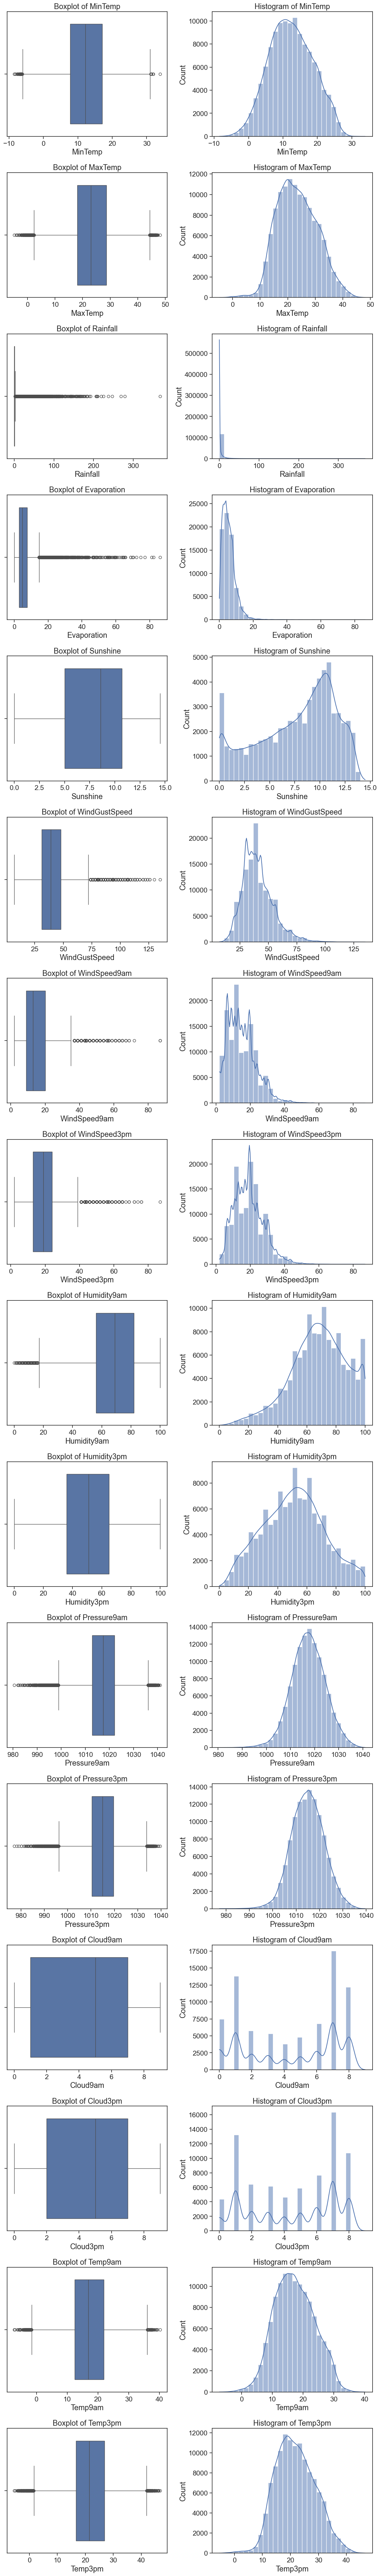

In [25]:
import math

numeric_cols = df.select_dtypes(include='float64').columns
num_cols = 1  # one column of pairs
num_rows = len(numeric_cols)

fig, axes = plt.subplots(num_rows, 2, figsize=(12, 5 * num_rows))

for i, col in enumerate(numeric_cols):
    # Boxplot on the left
    sns.boxplot(x=df[col], ax=axes[i, 0])
    axes[i, 0].set_title(f'Boxplot of {col}')
    
    # Histogram on the right
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i, 1])
    axes[i, 1].set_title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

#Given the presence of outliers and skewness for majority of features, I will use median to impute on null values 

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')
df[numeric_cols] = imputer.fit_transform(df[numeric_cols])
df.isnull().sum()

Date             0
Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Year             0
Month            0
Day              0
Season           0
dtype: int64

In [27]:
df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day,Season
0,2008-12-01 00:00:00+00:00,Albury,13.4,22.9,0.6,4.8,8.6,W,44.0,W,...,8.0,5.0,16.9,21.8,No,No,2008,12,1,Summer
1,2008-12-02 00:00:00+00:00,Albury,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,...,5.0,5.0,17.2,24.3,No,No,2008,12,2,Summer
2,2008-12-03 00:00:00+00:00,Albury,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,...,5.0,2.0,21.0,23.2,No,No,2008,12,3,Summer
3,2008-12-04 00:00:00+00:00,Albury,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,...,5.0,5.0,18.1,26.5,No,No,2008,12,4,Summer
4,2008-12-05 00:00:00+00:00,Albury,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,...,7.0,8.0,17.8,29.7,No,No,2008,12,5,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20 00:00:00+00:00,Uluru,3.5,21.8,0.0,4.8,8.6,E,31.0,ESE,...,5.0,5.0,9.4,20.9,No,No,2017,6,20,Winter
145455,2017-06-21 00:00:00+00:00,Uluru,2.8,23.4,0.0,4.8,8.6,E,31.0,SE,...,5.0,5.0,10.1,22.4,No,No,2017,6,21,Winter
145456,2017-06-22 00:00:00+00:00,Uluru,3.6,25.3,0.0,4.8,8.6,NNW,22.0,SE,...,5.0,5.0,10.9,24.5,No,No,2017,6,22,Winter
145457,2017-06-23 00:00:00+00:00,Uluru,5.4,26.9,0.0,4.8,8.6,N,37.0,SE,...,5.0,5.0,12.5,26.1,No,No,2017,6,23,Winter


In [28]:
df.drop(columns = 'Date', inplace = True)

In [29]:
df.drop(columns = 'RainToday', inplace = True)

In [30]:
df = df[df['Year'] != 2007]

In [31]:
df['RainTomorrow'].value_counts()

RainTomorrow
No     96276
Yes    27373
Name: count, dtype: int64

In [32]:
df['Season'].value_counts()

Season
Autumn    31817
Spring    31093
Summer    30821
Winter    29918
Name: count, dtype: int64

In [33]:
df['Location'].value_counts()

Location
Darwin              3119
Hobart              3106
Perth               3049
Brisbane            3029
MelbourneAirport    2943
SydneyAirport       2941
Cobar               2925
PerthAirport        2924
Woomera             2917
Mildura             2903
Cairns              2900
MountGambier        2898
Ballarat            2895
Portland            2890
Townsville          2884
NorfolkIsland       2868
SalmonGums          2865
GoldCoast           2832
Wollongong          2817
Nuriootpa           2812
WaggaWagga          2801
NorahHead           2790
Sale                2771
AliceSprings        2748
Adelaide            2746
Watsonia            2745
Bendigo             2725
Canberra            2701
Witchcliffe         2653
Moree               2635
CoffsHarbour        2568
MountGinini         2524
Walpole             2506
Launceston          2503
PearceRAAF          2469
BadgerysCreek       2458
Albury              2445
Dartmoor            2418
Penrith             2366
Tuggeranong     

In [34]:
df['Year'].value_counts()

Year
2016    15602
2015    15306
2014    15132
2013    14230
2009    14015
2010    13860
2011    13202
2012    13169
2017     7412
2008     1721
Name: count, dtype: int64

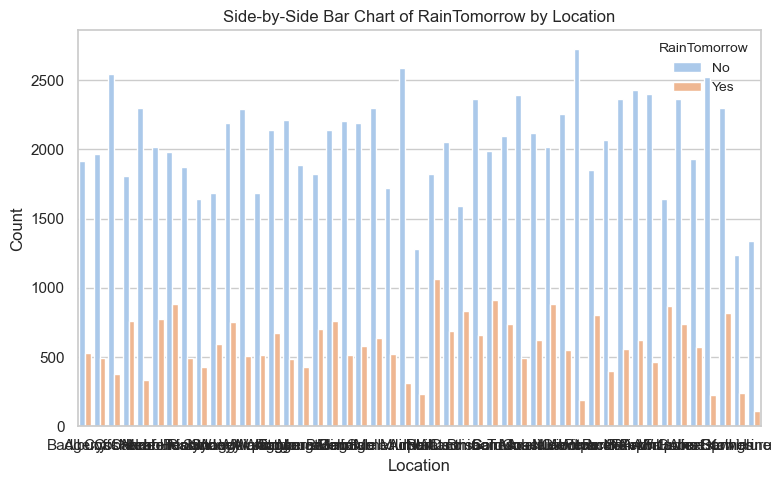

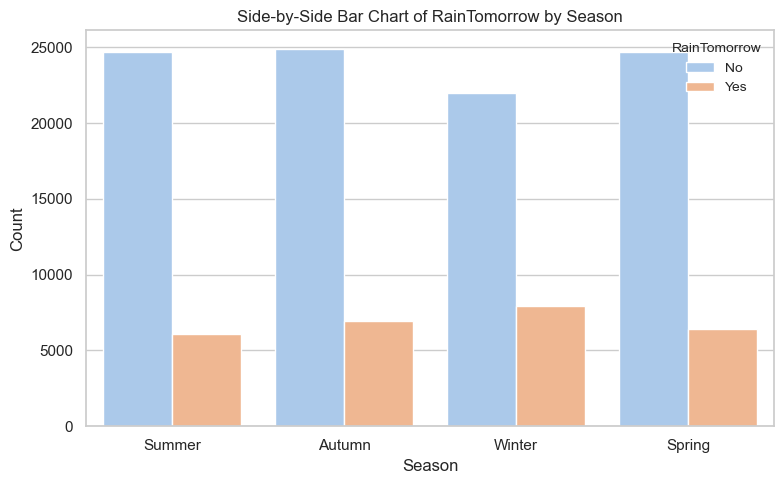

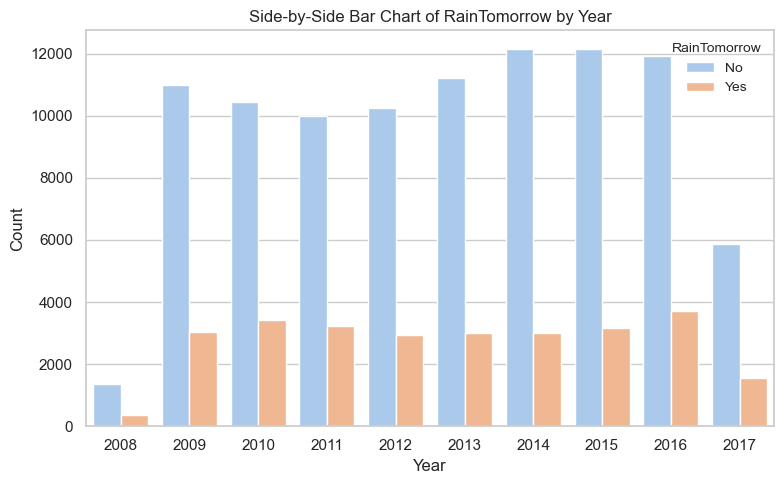

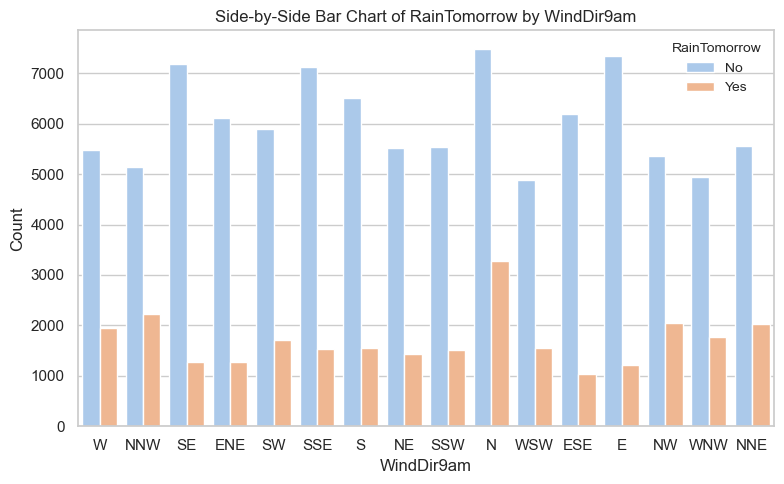

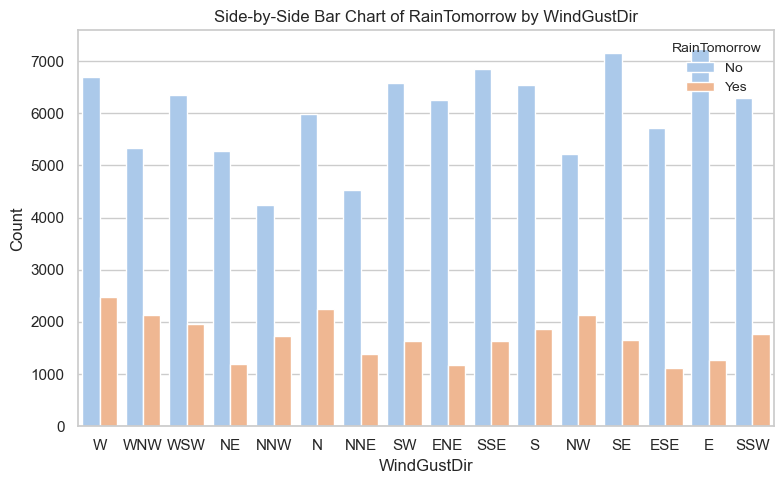

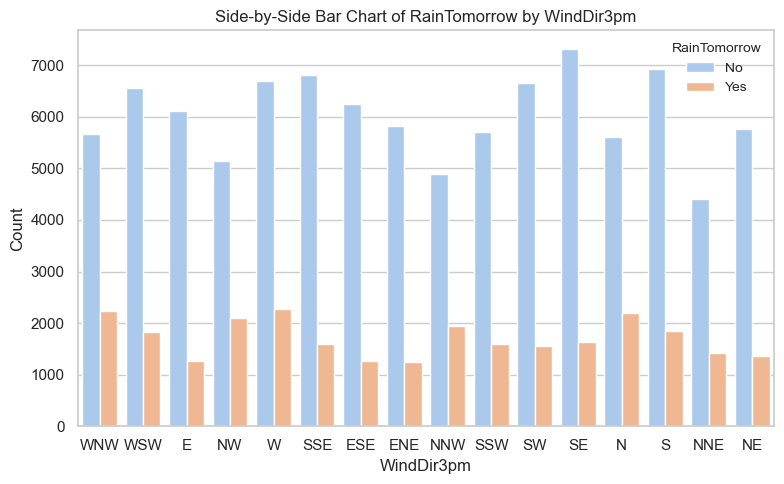

In [35]:
categorical_cols = ['Location', 'Season','Year','WindDir9am','WindGustDir','WindDir3pm']  
binary_cols = ['RainTomorrow']

sns.set(style='whitegrid')

for bin_col in binary_cols:
    for cat_col in categorical_cols:
        plt.figure(figsize=(8, 5))
        
        sns.countplot(data=df, x=cat_col, hue=bin_col, palette='pastel')

        plt.title(f'Side-by-Side Bar Chart of {bin_col} by {cat_col}')
        plt.xlabel(cat_col)
        plt.ylabel('Count')

        plt.legend(
            title=bin_col,
            loc='upper right',
            fontsize='small',
            title_fontsize='small',
            frameon=False
        )

        plt.tight_layout()
        plt.show()


In [36]:
#Retain outliers as random forest, xg boost is robust to them and outliers are possible on weather data. 

In [37]:
df

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow,Year,Month,Day,Season
0,Albury,13.4,22.9,0.6,4.8,8.6,W,44.0,W,WNW,...,1007.1,8.0,5.0,16.9,21.8,No,2008,12,1,Summer
1,Albury,7.4,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,...,1007.8,5.0,5.0,17.2,24.3,No,2008,12,2,Summer
2,Albury,12.9,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,...,1008.7,5.0,2.0,21.0,23.2,No,2008,12,3,Summer
3,Albury,9.2,28.0,0.0,4.8,8.6,NE,24.0,SE,E,...,1012.8,5.0,5.0,18.1,26.5,No,2008,12,4,Summer
4,Albury,17.5,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,2008,12,5,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,4.8,8.6,E,31.0,ESE,E,...,1021.2,5.0,5.0,9.4,20.9,No,2017,6,20,Winter
145455,Uluru,2.8,23.4,0.0,4.8,8.6,E,31.0,SE,ENE,...,1020.3,5.0,5.0,10.1,22.4,No,2017,6,21,Winter
145456,Uluru,3.6,25.3,0.0,4.8,8.6,NNW,22.0,SE,N,...,1019.1,5.0,5.0,10.9,24.5,No,2017,6,22,Winter
145457,Uluru,5.4,26.9,0.0,4.8,8.6,N,37.0,SE,WNW,...,1016.8,5.0,5.0,12.5,26.1,No,2017,6,23,Winter


In [38]:
df.dtypes

Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainTomorrow      object
Year               int32
Month              int32
Day                int32
Season            object
dtype: object

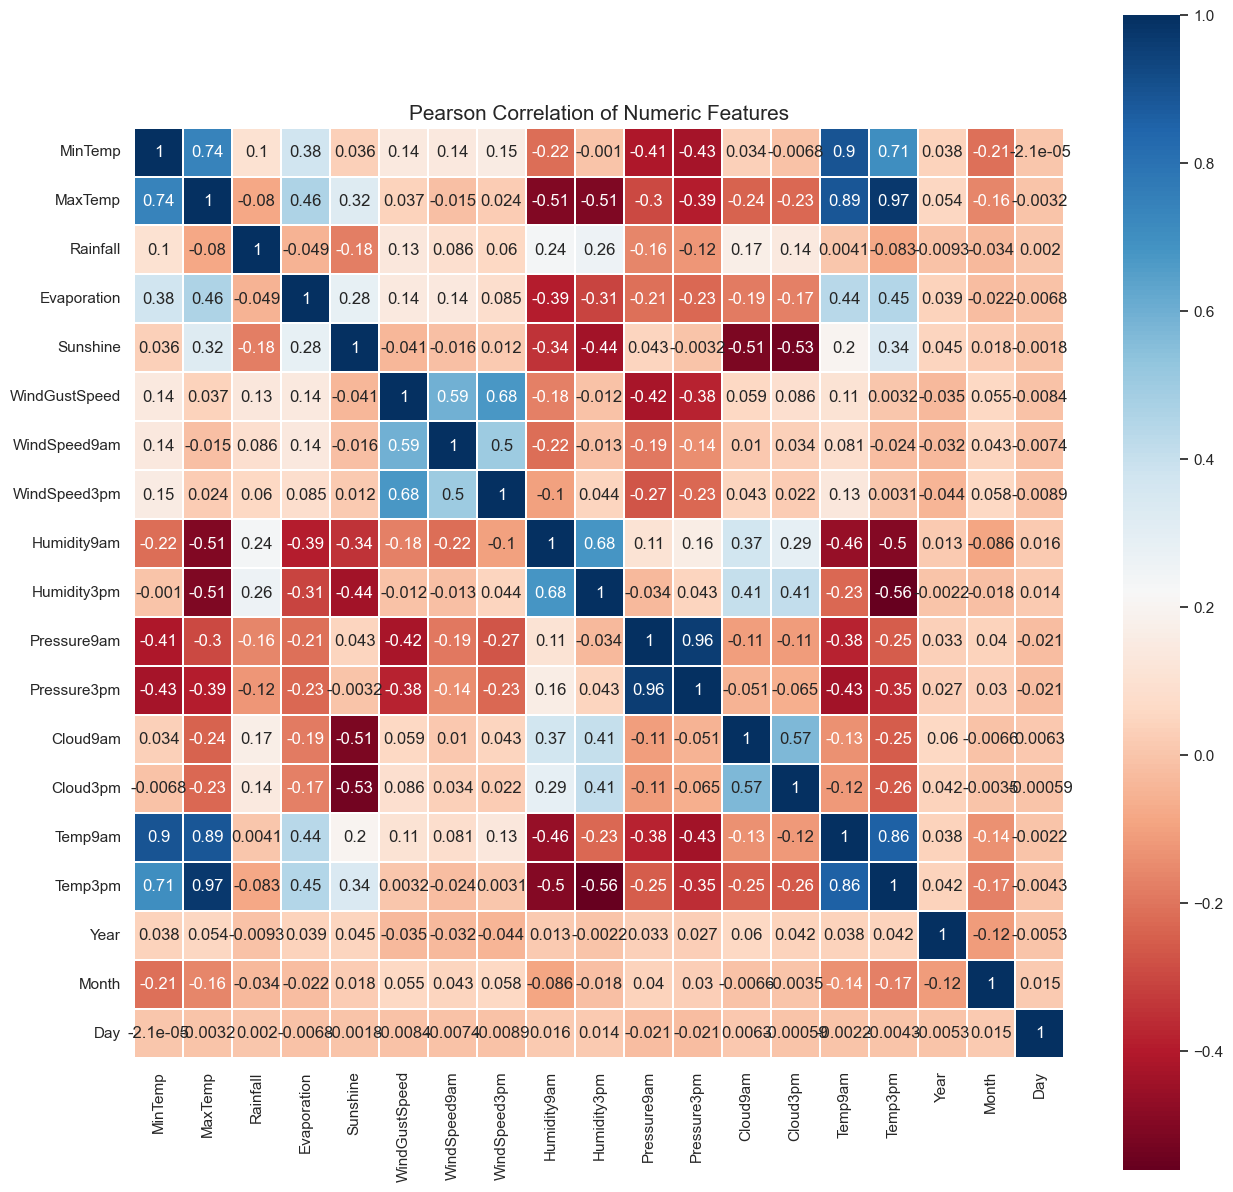

In [39]:
colormap = plt.cm.RdBu

# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include='number')

plt.figure(figsize=(15, 15))
plt.title('Pearson Correlation of Numeric Features', size=15)

sns.heatmap(numeric_df.corr(),
            linewidths=0.1,
            vmax=1.0,
            square=True,
            cmap=colormap,
            linecolor='white',
            annot=True)

plt.show()

In [40]:
df['RainTomorrow'] = df['RainTomorrow'].map({'Yes': 1, 'No': 0})

In [41]:
#Multicolinearity
# check the correlation for columns => MinTemp & MaxTemp with the target
print(f"Correlation between MinTemp and MaxTemp :{df['MinTemp'].corr(df['MaxTemp'])}")

print(f"Correlation between MinTemp and the target :{df['MinTemp'].corr(df['RainTomorrow'])}")

print(f"Correlation between MaxTemp and the target :{df['MaxTemp'].corr(df['RainTomorrow'])}")

Correlation between MinTemp and MaxTemp :0.7383496730798885
Correlation between MinTemp and the target :0.07658141894493234
Correlation between MaxTemp and the target :-0.16848472027802652


In [42]:
print(f"Correlation between Temp3pm and Temp9am :{df['Temp3pm'].corr(df['Temp9am'])}")

print(f"Correlation between Temp3pm and the target :{df['Temp3pm'].corr(df['RainTomorrow'])}")

print(f"Correlation between Temp9am and the target :{df['Temp9am'].corr(df['RainTomorrow'])}")

Correlation between Temp3pm and Temp9am :0.8568858196563978
Correlation between Temp3pm and the target :-0.20050267594931348
Correlation between Temp9am and the target :-0.036370817845313944


In [43]:
print(f"Correlation between Pressure3pm and Pressure9am :{df['Pressure3pm'].corr(df['Pressure9am'])}")

print(f"Correlation between Pressure3pm and the target :{df['Pressure3pm'].corr(df['RainTomorrow'])}")

print(f"Correlation between Pressure9am and the target :{df['Pressure9am'].corr(df['RainTomorrow'])}")

Correlation between Pressure3pm and Pressure9am :0.9595425981068938
Correlation between Pressure3pm and the target :-0.21546588988833737
Correlation between Pressure9am and the target :-0.23524451864334855


In [44]:
df.drop(columns = ['MinTemp','Temp9am','Pressure3pm'], inplace = True)

In [45]:
df

,Location,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Cloud9am,Cloud3pm,Temp3pm,RainTomorrow,Year,Month,Day,Season
0,Albury,22.9,0.6,4.8,8.6,W,44.0,W,WNW,20.0,...,22.0,1007.7,8.0,5.0,21.8,0,2008,12,1,Summer
1,Albury,25.1,0.0,4.8,8.6,WNW,44.0,NNW,WSW,4.0,...,25.0,1010.6,5.0,5.0,24.3,0,2008,12,2,Summer
2,Albury,25.7,0.0,4.8,8.6,WSW,46.0,W,WSW,19.0,...,30.0,1007.6,5.0,2.0,23.2,0,2008,12,3,Summer
3,Albury,28.0,0.0,4.8,8.6,NE,24.0,SE,E,11.0,...,16.0,1017.6,5.0,5.0,26.5,0,2008,12,4,Summer
4,Albury,32.3,1.0,4.8,8.6,W,41.0,ENE,NW,7.0,...,33.0,1010.8,7.0,8.0,29.7,0,2008,12,5,Summer
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,21.8,0.0,4.8,8.6,E,31.0,ESE,E,15.0,...,27.0,1024.7,5.0,5.0,20.9,0,2017,6,20,Winter
145455,Uluru,23.4,0.0,4.8,8.6,E,31.0,SE,ENE,13.0,...,24.0,1024.6,5.0,5.0,22.4,0,2017,6,21,Winter
145456,Uluru,25.3,0.0,4.8,8.6,NNW,22.0,SE,N,13.0,...,21.0,1023.5,5.0,5.0,24.5,0,2017,6,22,Winter
145457,Uluru,26.9,0.0,4.8,8.6,N,37.0,SE,WNW,9.0,...,24.0,1021.0,5.0,5.0,26.1,0,2017,6,23,Winter


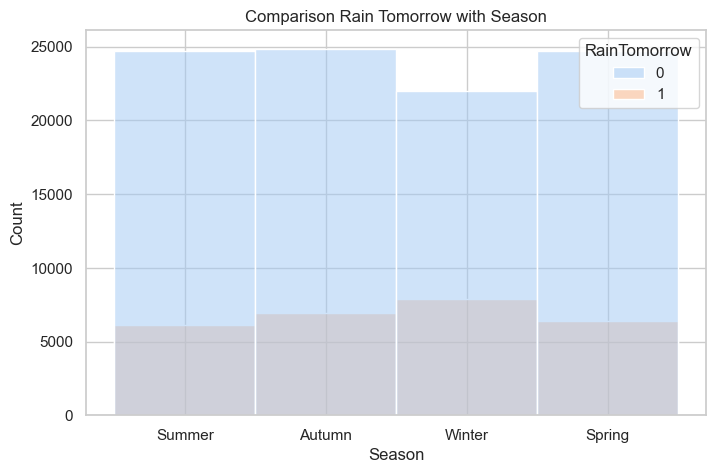

In [46]:
plt.figure(figsize=(8,5))
sns.histplot(data=df, x = 'Season', hue = 'RainTomorrow', palette = 'pastel')
plt.title("Comparison Rain Tomorrow with Season")

plt.show()

In [47]:
rain_season_table = pd.crosstab(df['Season'], df['RainTomorrow'])
rain_season_table

RainTomorrow,0,1
Season,,
Autumn,24879,6938
Spring,24694,6399
Summer,24704,6117
Winter,21999,7919


In [48]:
df.drop(columns = ['Year','Month','Day'], inplace = True)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 123649 entries, 0 to 145458
Data columns (total 19 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       123649 non-null  object 
 1   MaxTemp        123649 non-null  float64
 2   Rainfall       123649 non-null  float64
 3   Evaporation    123649 non-null  float64
 4   Sunshine       123649 non-null  float64
 5   WindGustDir    123649 non-null  object 
 6   WindGustSpeed  123649 non-null  float64
 7   WindDir9am     123649 non-null  object 
 8   WindDir3pm     123649 non-null  object 
 9   WindSpeed9am   123649 non-null  float64
 10  WindSpeed3pm   123649 non-null  float64
 11  Humidity9am    123649 non-null  float64
 12  Humidity3pm    123649 non-null  float64
 13  Pressure9am    123649 non-null  float64
 14  Cloud9am       123649 non-null  float64
 15  Cloud3pm       123649 non-null  float64
 16  Temp3pm        123649 non-null  float64
 17  RainTomorrow   123649 non-null  in

In [50]:
#categorical to numeric
from sklearn.preprocessing import OneHotEncoder

# 1. Select categorical and numeric columns
cat_cols = ['Location', 'Season', 'WindDir9am', 'WindGustDir', 'WindDir3pm']
num_cols = df.columns.difference(cat_cols)

# 2. Apply OneHotEncoder to categorical columns
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
encoded_array = ohe.fit_transform(df[cat_cols])

# 3. Get new encoded column names
encoded_col_names = ohe.get_feature_names_out(cat_cols)

# 4. Build new DataFrame with encoded + numeric columns
df_encoded = pd.DataFrame(encoded_array, columns=encoded_col_names).reset_index(drop=True)

# 5. Concatenate encoded + numeric data
df_numeric = df[num_cols].reset_index(drop=True)
df_encoded = pd.concat([df_encoded, df_numeric], axis=1)


In [51]:
df_encoded

,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,Humidity9am,MaxTemp,Pressure9am,RainTomorrow,Rainfall,Sunshine,Temp3pm,WindGustSpeed,WindSpeed3pm,WindSpeed9am
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,71.0,22.9,1007.7,0,0.6,8.6,21.8,44.0,24.0,20.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,44.0,25.1,1010.6,0,0.0,8.6,24.3,44.0,22.0,4.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38.0,25.7,1007.6,0,0.0,8.6,23.2,46.0,26.0,19.0
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,45.0,28.0,1017.6,0,0.0,8.6,26.5,24.0,9.0,11.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,82.0,32.3,1010.8,0,1.0,8.6,29.7,41.0,20.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,59.0,21.8,1024.7,0,0.0,8.6,20.9,31.0,13.0,15.0
123645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,51.0,23.4,1024.6,0,0.0,8.6,22.4,31.0,11.0,13.0
123646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,56.0,25.3,1023.5,0,0.0,8.6,24.5,22.0,9.0,13.0
123647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,53.0,26.9,1021.0,0,0.0,8.6,26.1,37.0,9.0,9.0


In [52]:
#standardisation

In [53]:
from sklearn.preprocessing import StandardScaler

# Updated numeric columns to scale (excluding Year, Month, Day)
original_num_cols = [
    'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
    'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
    'Pressure9am', 'Cloud9am', 'Cloud3pm', 'Temp3pm'
]

# Step 2: Standardize those numeric columns
scaler = StandardScaler()
scaled_array = scaler.fit_transform(df_encoded[original_num_cols])

# Step 3: Replace scaled columns in df_encoded
df_scaled = df_encoded.copy()
df_scaled[original_num_cols] = scaled_array

In [54]:
df_scaled

,Location_Adelaide,Location_Albury,Location_AliceSprings,Location_BadgerysCreek,Location_Ballarat,Location_Bendigo,Location_Brisbane,Location_Cairns,Location_Canberra,Location_Cobar,...,Humidity9am,MaxTemp,Pressure9am,RainTomorrow,Rainfall,Sunshine,Temp3pm,WindGustSpeed,WindSpeed3pm,WindSpeed9am
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.175758,-0.079638,-1.433445,0,-0.208153,0.169804,-0.013289,0.247567,0.562860,0.600174
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.246896,0.225631,-1.004827,0,-0.278505,0.169804,0.343514,0.247567,0.329514,-1.325912
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.563041,0.308886,-1.448225,0,-0.278505,0.169804,0.186521,0.396936,0.796206,0.479793
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-1.194205,0.628031,0.029768,0,-0.278505,0.169804,0.657501,-1.246122,-1.187234,-0.483249
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.755358,1.224692,-0.975267,0,-0.161252,0.169804,1.114209,0.023513,0.096168,-0.964771
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123644,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.456533,-0.232272,1.079144,0,-0.278505,0.169804,-0.141738,-0.723331,-0.720543,-0.001728
123645,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.878059,-0.010259,1.064364,0,-0.278505,0.169804,0.072344,-0.723331,-0.953888,-0.242489
123646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.614605,0.253383,0.901785,0,-0.278505,0.169804,0.372058,-1.395491,-1.187234,-0.242489
123647,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,-0.772678,0.475396,0.532286,0,-0.278505,0.169804,0.600412,-0.275225,-1.187234,-0.724010


In [55]:
nulls = df_scaled.isnull().sum()
print(nulls[nulls > 0])

Series([], dtype: int64)


In [56]:
print("Original row count:", df.shape[0])
print("Encoded + Scaled row count:", df_scaled.shape[0])

Original row count: 123649
Encoded + Scaled row count: 123649


In [57]:
non_numeric_cols = df_scaled.select_dtypes(exclude=[np.number]).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

Non-numeric columns: []


In [58]:
summary_stats = df_scaled.describe().T
print(summary_stats[['mean', 'std', 'min', 'max']])

                                mean       std       min       max
Location_Adelaide       2.220802e-02  0.147360  0.000000  1.000000
Location_Albury         1.977371e-02  0.139222  0.000000  1.000000
Location_AliceSprings   2.222420e-02  0.147413  0.000000  1.000000
Location_BadgerysCreek  1.987885e-02  0.139585  0.000000  1.000000
Location_Ballarat       2.341305e-02  0.151212  0.000000  1.000000
...                              ...       ...       ...       ...
Sunshine                1.094124e-16  1.000004 -2.884753  2.265372
Temp3pm                 4.827018e-16  1.000004 -3.895310  3.540472
WindGustSpeed          -1.913568e-16  1.000004 -2.515758  7.043852
WindSpeed3pm           -1.395238e-16  1.000004 -2.003945  7.913254
WindSpeed9am            7.217541e-17  1.000004 -1.566672  8.665656

[113 rows x 4 columns]


In [59]:
duplicates = df_scaled.duplicated().sum()
print(f"Number of duplicated rows: {duplicates}")

Number of duplicated rows: 0


In [60]:
#Feature Selection through decision tree

In [61]:
pip install shap


Note: you may need to restart the kernel to use updated packages.


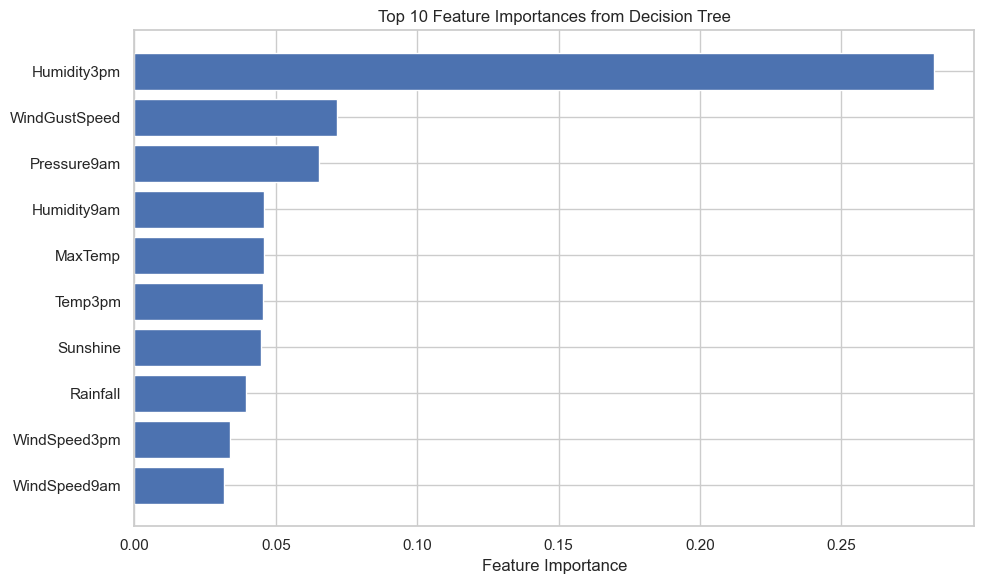

In [64]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier

# Assume df_scaled is ready, with 'RainTomorrow' as target

# Step 1: Prepare data
X = df_scaled.drop(columns=['RainTomorrow'])
y = df_scaled['RainTomorrow']

# Step 2: Train Decision Tree
tree = DecisionTreeClassifier(random_state=42)
tree.fit(X, y)

# Step 3: Get feature importances
importances = tree.feature_importances_
features = X.columns

# Step 4: Create a DataFrame and sort
feat_imp_df = (
    pd.DataFrame({'Feature': features, 'Importance': importances})
    .sort_values(by='Importance', ascending=False)
)

# Step 5: Plot top 10 features
top_n = 10
plt.figure(figsize=(10, 6))
plt.barh(feat_imp_df['Feature'][:top_n][::-1], feat_imp_df['Importance'][:top_n][::-1])
plt.xlabel('Feature Importance')
plt.title('Top 10 Feature Importances from Decision Tree')
plt.tight_layout()
plt.show()


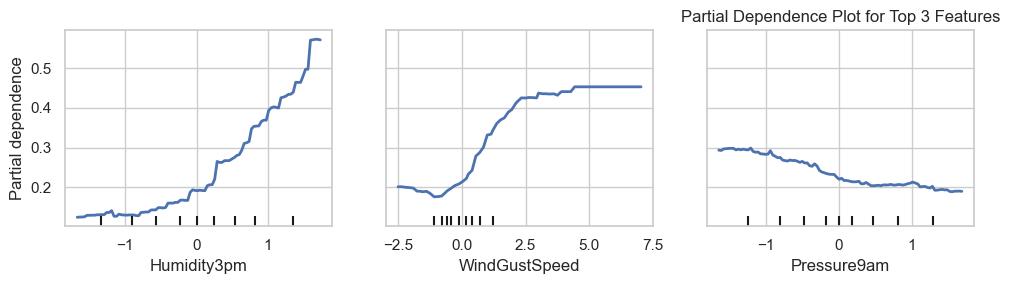

In [72]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

top_3 = feat_imp_df.head(3)['Feature'].tolist()

fig, ax = plt.subplots(figsize=(10, 3))

PartialDependenceDisplay.from_estimator(
    tree,
    X,
    features=top_3,
    ax=ax,
    line_kw={"linewidth": 2}
)

plt.title("Partial Dependence Plot for Top 3 Features")
plt.tight_layout()
plt.show()


In [74]:
#Modelling
X = df_scaled.drop(columns=['RainTomorrow'])
y = df_scaled['RainTomorrow']

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size = 0.2,
                                                    random_state = 10,
                                                    stratify = y)

In [78]:
df_scaled.shape

(123649, 113)

In [ ]:
#Model 1: Logistic Regression

In [80]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import loguniform

# Define logistic regression model
log_reg = LogisticRegression(
    solver="saga",
    max_iter=4000,
    class_weight="balanced",   # handles class imbalance
    random_state=42,
    n_jobs=-1
)

# Define hyperparameter search space
log_params = {
    "C": loguniform(1e-4, 10),   # inverse of regularization strength
    "penalty": ["l1", "l2"],
}

search = RandomizedSearchCV(
    estimator=log_reg,
    param_distributions=log_params,
    n_iter=20,               # try 20 random combinations
    cv=5,
    scoring="roc_auc",       # measure ability to rank rain/no rain
    random_state=42,
    verbose=1,
    n_jobs=-1
)

search.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5,
                   estimator=LogisticRegression(class_weight='balanced',
                                                max_iter=4000, n_jobs=-1,
                                                random_state=42,
                                                solver='saga'),
                   n_iter=20, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x1554c9730>,
                                        'penalty': ['l1', 'l2']},
                   random_state=42, scoring='roc_auc', verbose=1)

In [84]:
best_log_reg = search.best_estimator_


In [86]:
# Match coefficients to feature names
coef_df = pd.DataFrame({
    "Feature": X_train.columns,
    "Coefficient": best_log_reg.coef_[0]
})

# Sort by absolute value to see most influential
coef_df["AbsCoefficient"] = coef_df["Coefficient"].abs()
coef_df = coef_df.sort_values(by="AbsCoefficient", ascending=False)


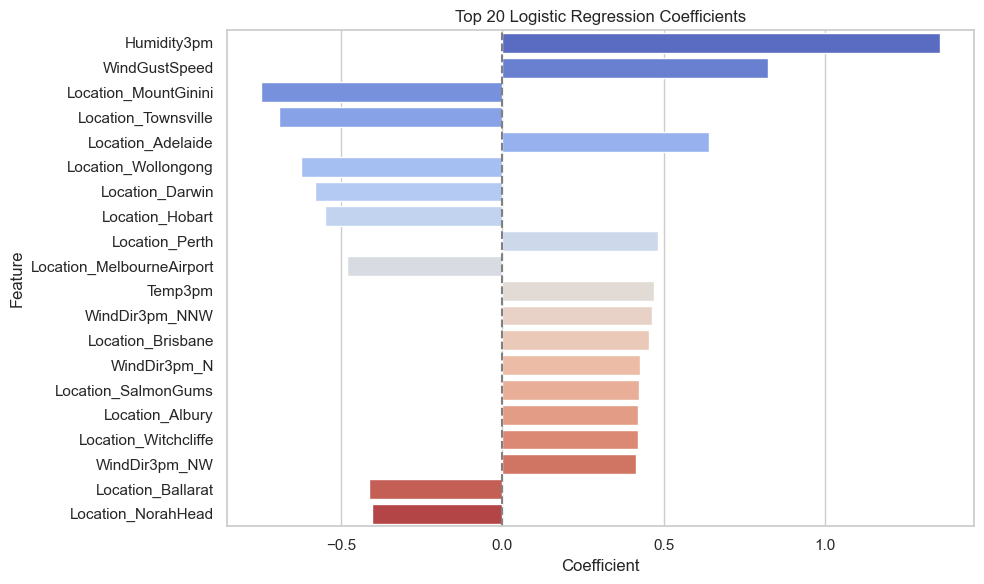

In [88]:
import matplotlib.pyplot as plt
import seaborn as sns

top_n = 20  # you can change this
plt.figure(figsize=(10, 6))
sns.barplot(data=coef_df.head(top_n), x="Coefficient", y="Feature", palette="coolwarm")
plt.axvline(0, color='gray', linestyle='--')
plt.title(f"Top {top_n} Logistic Regression Coefficients")
plt.tight_layout()
plt.show()


In [90]:
y_train_pred = best_log_reg.predict(X_train)
y_train_prob = best_log_reg.predict_proba(X_train)[:, 1] 

In [92]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred,pos_label=1))
print("Training Recall:", recall_score(y_train, y_train_pred,pos_label=1))
print("Training F1 Score:", f1_score(y_train, y_train_pred,pos_label=1))
print("Training ROC AUC:", roc_auc_score(y_train, y_train_prob,))

Training Accuracy: 0.7991892356372385
Training Precision: 0.5316644872034373
Training Recall: 0.7797972417572381
Training F1 Score: 0.6322571090047393
Training ROC AUC: 0.875853554636474


Test Accuracy: 0.7991508289526891
Test Precision: 0.5314590042110479
Test Recall: 0.7837442922374429
Test F1 Score: 0.6334046793121264
Test ROC AUC: 0.8752121645448198


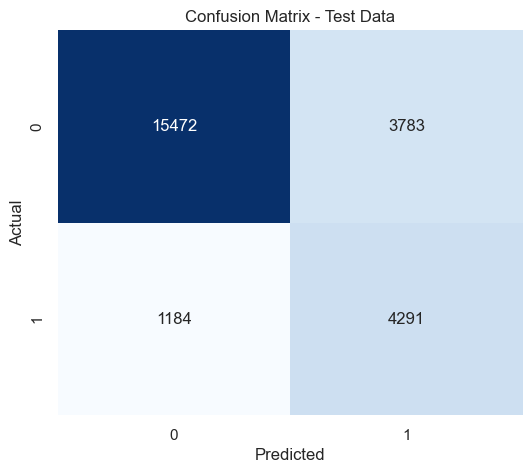

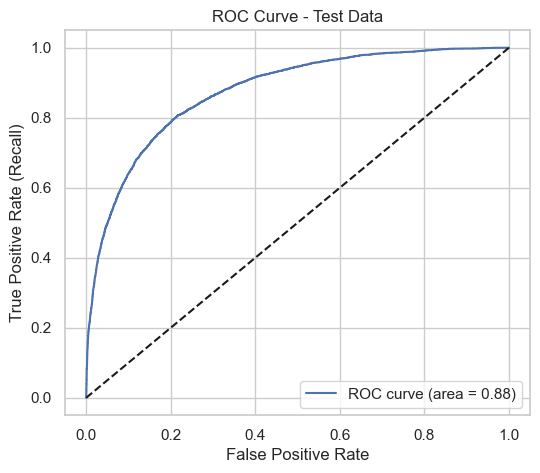

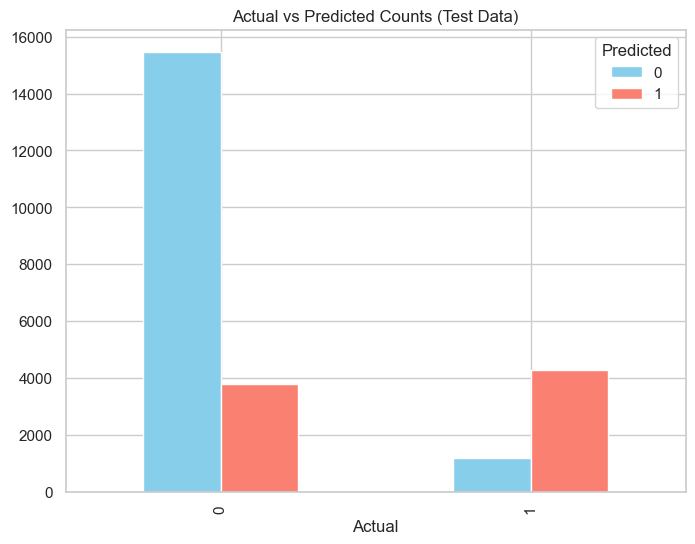

In [94]:
# 1. Predict on test data
y_test_pred = best_log_reg.predict(X_test)
y_test_prob = best_log_reg.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# 2. Print metrics
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, pos_label=1))
print("Test Recall:", recall_score(y_test, y_test_pred, pos_label=1))
print("Test F1 Score:", f1_score(y_test, y_test_pred, pos_label=1))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))

# 3. Confusion Matrix heatmap
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label=1)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.show()

# 6. Actual vs Predicted counts bar chart
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
counts = pd.crosstab(df_compare['Actual'], df_compare['Predicted'], rownames=['Actual'], colnames=['Predicted'])
counts.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title("Actual vs Predicted Counts (Test Data)")
plt.show()


In [ ]:
#Model 2: Random Tree Classifier

In [96]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, classification_report

# Base model
rf = RandomForestClassifier(
    n_jobs=-1,
    class_weight='balanced',
    random_state=42
)

# Small, targeted hyperparameter grid (just a few good combos)
rf_params = {
    "n_estimators": [300, 500],
    "max_depth": [15, None],
    "min_samples_split": [2],
    "min_samples_leaf": [1],
    "max_features": ["sqrt"]
}

# GridSearchCV (much faster than randomized)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=rf_params,
    cv=3,
    scoring='roc_auc',
    verbose=1,
    n_jobs=-1
)

# Fit model
grid_search.fit(X_train, y_train)

# Best model
best_rf = grid_search.best_estimator_

print("✅ Best Parameters:")
print(grid_search.best_params_)


Fitting 3 folds for each of 4 candidates, totalling 12 fits
✅ Best Parameters:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [106]:
y_train_pred = best_rf.predict(X_train)
y_train_prob = best_rf.predict_proba(X_train)[:, 1] 

In [107]:
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Training Precision:", precision_score(y_train, y_train_pred,pos_label=1))
print("Training Recall:", recall_score(y_train, y_train_pred,pos_label=1))
print("Training F1 Score:", f1_score(y_train, y_train_pred,pos_label=1))
print("Training ROC AUC:", roc_auc_score(y_train, y_train_prob,))

Training Accuracy: 1.0
Training Precision: 1.0
Training Recall: 1.0
Training F1 Score: 1.0
Training ROC AUC: 1.0


Test Accuracy: 0.8594015365952284
Test Precision: 0.7831632653061225
Test Recall: 0.5046575342465753
Test F1 Score: 0.6137954015328224
Test ROC AUC: 0.8946087323579596


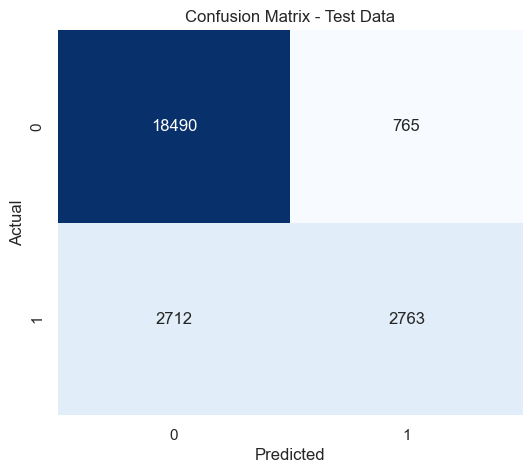

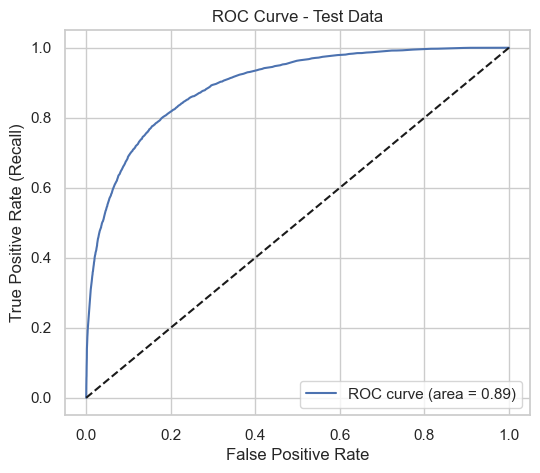

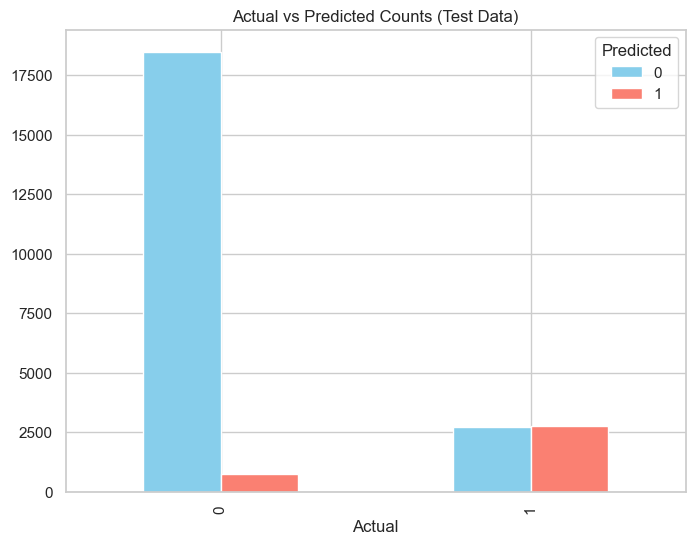

In [98]:
# 1. Predict on test data
y_test_pred = best_rf.predict(X_test)
y_test_prob = best_rf.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# 2. Print metrics
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, pos_label=1))
print("Test Recall:", recall_score(y_test, y_test_pred, pos_label=1))
print("Test F1 Score:", f1_score(y_test, y_test_pred, pos_label=1))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))

# 3. Confusion Matrix heatmap
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label=1)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.show()

# 6. Actual vs Predicted counts bar chart
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
counts = pd.crosstab(df_compare['Actual'], df_compare['Predicted'], rownames=['Actual'], colnames=['Predicted'])
counts.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title("Actual vs Predicted Counts (Test Data)")
plt.show()


In [ ]:
#Model 3: XGBoost

In [100]:
!pip install xgboost

In [102]:
# Calculate ratio: negative / positive class
from collections import Counter

counter = Counter(y_train)
neg = counter[0]  # 'No'
pos = counter[1]  # 'Yes'

scale_pos_weight = neg / pos
print(f"scale_pos_weight: {scale_pos_weight:.2f}")

scale_pos_weight: 3.52


In [104]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb = XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    use_label_encoder=False,
    n_jobs=-1,
    random_state=42,
    scale_pos_weight=3.52
)

xgb_params = {
    "n_estimators": [100, 300],
    "max_depth": [3, 6],
    "learning_rate": [0.1],      # fixed to reduce search time
    "subsample": [0.8],
    "colsample_bytree": [0.8],
    "gamma": [0, 1]
}

grid_xgb = GridSearchCV(
    estimator=xgb,
    param_grid=xgb_params,
    scoring='roc_auc',
    cv=3,
    n_jobs=-1,
    verbose=1
)

grid_xgb.fit(X_train, y_train)

best_xgb = grid_xgb.best_estimator_

print("✅ Best XGBoost Parameters:")
print(grid_xgb.best_params_)


Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:57:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:57:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:57:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [12:57:54] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

✅ Best XGBoost Parameters:
{'colsample_bytree': 0.8, 'gamma': 0, 'learning_rate': 0.1, 'max_depth': 6, 'n_estimators': 300, 'subsample': 0.8}


Test Accuracy: 0.8251516376870198
Test Precision: 0.5767640389489129
Test Recall: 0.7897716894977169
Test F1 Score: 0.6666666666666666
Test ROC AUC: 0.8977449348980102


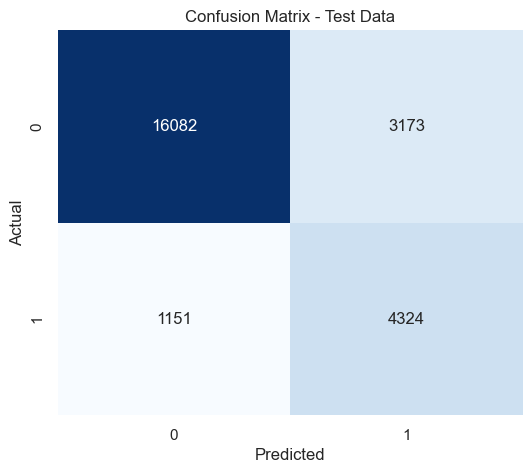

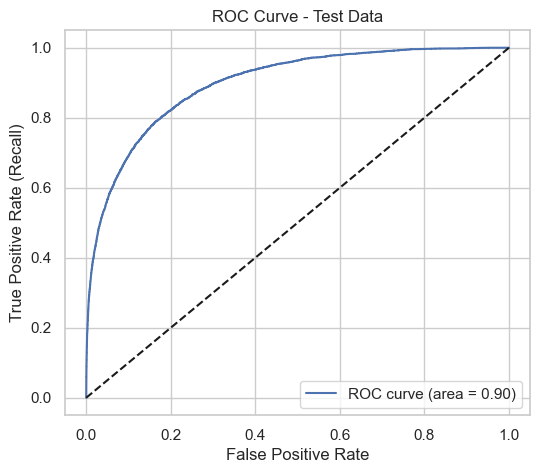

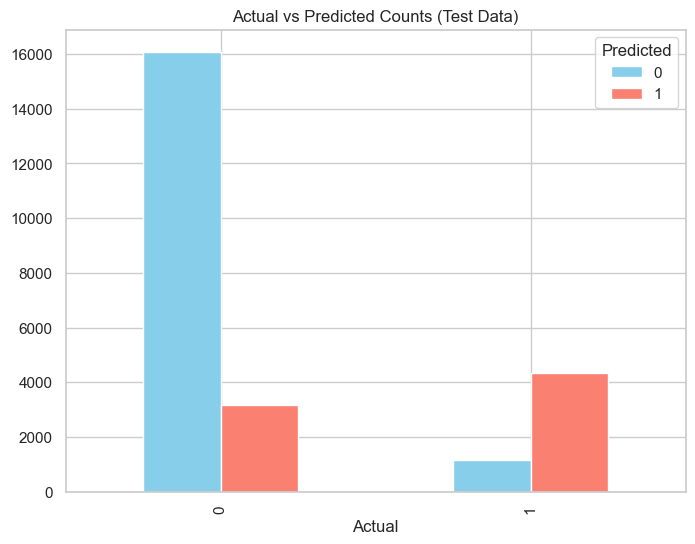

In [110]:
# 1. Predict on test data
y_test_pred = best_xgb.predict(X_test)
y_test_prob = best_xgb.predict_proba(X_test)[:, 1]  # Probabilities for positive class

# 2. Print metrics
print("Test Accuracy:", accuracy_score(y_test, y_test_pred))
print("Test Precision:", precision_score(y_test, y_test_pred, pos_label=1))
print("Test Recall:", recall_score(y_test, y_test_pred, pos_label=1))
print("Test F1 Score:", f1_score(y_test, y_test_pred, pos_label=1))
print("Test ROC AUC:", roc_auc_score(y_test, y_test_prob))

# 3. Confusion Matrix heatmap
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Test Data')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# 4. ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob, pos_label=1)
plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc_score(y_test, y_test_prob):.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC Curve - Test Data')
plt.legend(loc='lower right')
plt.show()

# 6. Actual vs Predicted counts bar chart
df_compare = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})
counts = pd.crosstab(df_compare['Actual'], df_compare['Predicted'], rownames=['Actual'], colnames=['Predicted'])
counts.plot(kind='bar', figsize=(8,6), color=['skyblue', 'salmon'])
plt.title("Actual vs Predicted Counts (Test Data)")
plt.show()


Fit time of models to choose which is best

In [112]:
import time

# --- Logistic Regression ---
start = time.time()
search.fit(X_train, y_train)
log_time = time.time() - start
print(f"⏱️ Logistic Regression fit time: {log_time:.2f} seconds")

# --- Random Forest ---
start = time.time()
grid_search.fit(X_train, y_train)
rf_time = time.time() - start
print(f"⏱️ Random Forest fit time: {rf_time:.2f} seconds")

# --- XGBoost ---
start = time.time()
grid_xgb.fit(X_train, y_train)
xgb_time = time.time() - start
print(f"⏱️ XGBoost fit time: {xgb_time:.2f} seconds")


Fitting 5 folds for each of 20 candidates, totalling 100 fits
⏱️ Logistic Regression fit time: 119.18 seconds
Fitting 3 folds for each of 4 candidates, totalling 12 fits
⏱️ Random Forest fit time: 114.02 seconds
Fitting 3 folds for each of 8 candidates, totalling 24 fits


/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:09:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:09:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:09:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
/opt/anaconda3/lib/python3.12/site-packages/xgboost/training.py:183: UserWarning: [13:09:03] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i

⏱️ XGBoost fit time: 17.68 seconds
